# MSDS692 Project: Clustering Car Accidents in Denver (2014-2018)
## Natalia Weakly 
### Individual accidents data

In [1]:
# Imports
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Load previousely processed csv file
accidents_clust=pd.read_csv('../MSDSProject/accidents_allForML.csv',index_col=0)

In [4]:
# Check the load
accidents_clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120056 entries, 0 to 120055
Columns: 123 entries, BicycleInvolved to DayOfWeek_6
dtypes: float64(12), int64(111)
memory usage: 113.6 MB


In [7]:
# Check data 
accidents_clust.head()

,BicycleInvolved,PedestrianInvolved,Holiday,RushHour,Daytime,AstroTwighlight,NauticalTwighlight,CivilTwighlight,DIA_max_temp,DIA_min_temp,...,Neighboorhood_Westwood,Neighboorhood_Whittier,Neighboorhood_Windsor,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,0,0,1,0,0,0,0,0,0.396226,0.359551,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0.396226,0.359551,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0.396226,0.359551,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0.396226,0.359551,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0.396226,0.359551,...,0,0,0,0,0,1,0,0,0,0


In [5]:
accidents_clust.tail()

,BicycleInvolved,PedestrianInvolved,Holiday,RushHour,Daytime,AstroTwilight,NauticalTwilight,CivilTwilight,DIA_max_temp,DIA_min_temp,...,Neighboorhood_Westwood,Neighboorhood_Whittier,Neighboorhood_Windsor,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
120051,0,0,0,0,1,0,0,0,0.311321,0.213483,...,0,0,0,1,0,0,0,0,0,0
120052,0,0,0,0,0,0,0,0,0.311321,0.213483,...,0,0,0,1,0,0,0,0,0,0
120053,0,0,0,0,0,0,0,0,0.367925,0.382022,...,0,0,0,0,0,0,0,0,1,0
120054,0,0,0,0,0,0,0,0,0.509434,0.516854,...,0,0,0,0,0,0,0,0,0,1
120055,0,0,0,1,1,0,0,0,0.452830,0.438202,...,0,0,0,1,0,0,0,0,0,0


In [6]:
# List of the column names
list(accidents_clust)

['BicycleInvolved',
 'PedestrianInvolved',
 'Holiday',
 'RushHour',
 'Daytime',
 'AstroTwilight',
 'NauticalTwilight',
 'CivilTwilight',
 'DIA_max_temp',
 'DIA_min_temp',
 'DIA_precipitation',
 'DIA_snowfall',
 'St_max_temp',
 'St_min_temp',
 'St_precipitation',
 'St_snowfall',
 'DW_max_temp',
 'DW_min_temp',
 'DW_precipitation',
 'DW_snowfall',
 'OffenseCode_5401',
 'OffenseCode_5420',
 'OffenseCode_5441',
 'OffenseExtension_0',
 'OffenseExtension_1',
 'OffenseExtension_2',
 'OffenseExtension_3',
 'OffenseType_TRAF-ACCIDENT-',
 'OffenseType_TRAF-HIT & RUN',
 'OffenseType_TRF-ACCIDENT',
 'OffenseType_TRF-ACDT-DUI',
 'OffenseCategory_TRAF - ACCIDENT',
 'OffenseCategory_TRAF - ACCIDENT - DUI/DUID',
 'OffenseCategory_TRAF - ACCIDENT - FATAL',
 'OffenseCategory_TRAF - ACCIDENT - HIT & RUN',
 'OffenseCategory_TRAF - ACCIDENT - POLICE',
 'OffenseCategory_TRAF - ACCIDENT - SBI',
 'Neighboorhood_Athmar Park',
 'Neighboorhood_Auraria',
 'Neighboorhood_Baker',
 'Neighboorhood_Barnum',
 'Neighboo

## K-Means Clustering
### Optimum Number of Clusters

In [7]:
# Determine the optimum number of clusters using the "Elbow Method"
# based on calculating the Within Sum of Squared Errors

# Explore 2 - 49  possible clusters
# It is a narrower range than usually recommended from 2 to square root of the number of observations

# NOTE: This step might take a while...

clusters_range= range(2,50)
#within sum of squared errors
sumOfSquares=[]

#create clusters for each of the numbers in the range
#use random_state=123 to be able to replicate results

for numberOfClusters in clusters_range:
    clusters = KMeans(numberOfClusters, random_state=123)
    clusters.fit(accidents_clust)
    sumOfSquares.append(clusters.inertia_)

In [8]:
#output results in a data frame
clusters_results = pd.DataFrame({'numberOfClusters': clusters_range, 'sumOfSquares': sumOfSquares})

In [9]:
# Display the number of clusters and the corresponding sums of squared errors
clusters_results

,numberOfClusters,sumOfSquares
0,2,354651.504251
1,3,331494.793830
2,4,315469.089533
3,5,300697.636467
4,6,292024.537952
5,7,285935.961977
6,8,272213.916271
7,9,264066.900765
8,10,249630.847813
9,11,246881.590891


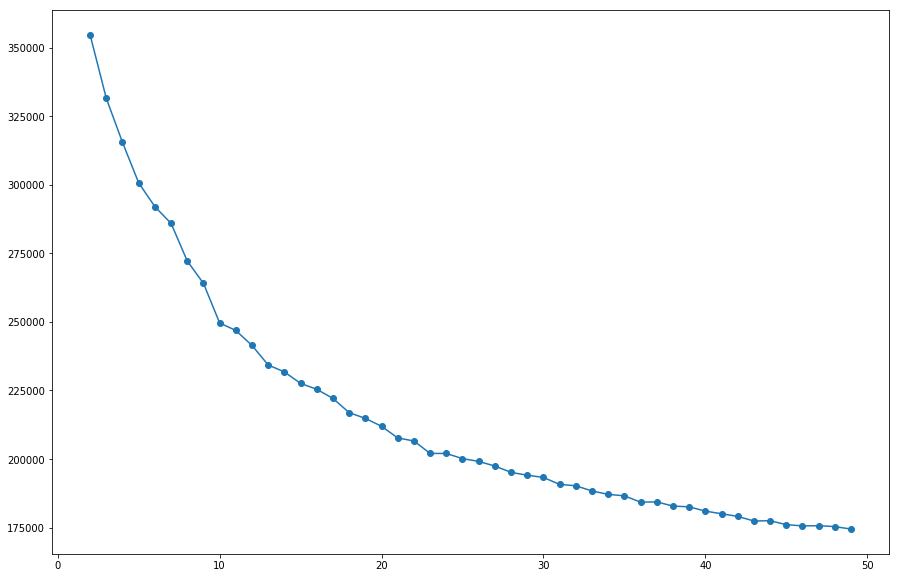

In [10]:
#plot results
plt.figure(figsize=(15, 10))
plt.plot(clusters_results.numberOfClusters, clusters_results.sumOfSquares, marker='o')


The output above shows that the resulting plot does not have a very clear "elbow" showing the most advantageous number of clusters. 10 clusters seem to be an option, but other numbers between approximately 10 and 20 could be considered, after which the benefits of adding additional clusters are diminishing. So, in order to determine the optimal number of clusters let's use a second method - the silhouette scores.


In [11]:
# Optimum number of clusters using the silhouette analysis
# (measuring how similar object within the same clusters are (cohesion) compared to other clusters (separation))
# score range [-1, 1], the higher scores mean better cluster fit
from sklearn.metrics import silhouette_samples, silhouette_score

In [12]:
# Calculate silhouette scores for 2 to 49 clusters
for numberOfClusters in clusters_range:
    #initailize clusters with numberOfClusters vlaue and a random generator 123 for reproducibility
    clusters2=KMeans(numberOfClusters, random_state=123)
    clusters_labels=clusters2.fit_predict(accidents_clust)
    #silhouette scores - the mean Silhouette coefficient of all samples
    silhouette_avg = silhouette_score(accidents_clust, clusters_labels)
    print("For number of clusters = :", numberOfClusters, "The average silhouette score is :", silhouette_avg)

For number of clusters = : 2 The average silhouette score is : 0.2935966082895708
For number of clusters = : 3 The average silhouette score is : 0.3102809588033974
For number of clusters = : 4 The average silhouette score is : 0.15026467808348634
For number of clusters = : 5 The average silhouette score is : 0.14335541506043753
For number of clusters = : 6 The average silhouette score is : 0.16748282720066068
For number of clusters = : 7 The average silhouette score is : 0.08686249488574899
For number of clusters = : 8 The average silhouette score is : 0.1443513885554915
For number of clusters = : 9 The average silhouette score is : 0.1567491511780376
For number of clusters = : 10 The average silhouette score is : 0.2181847230547514
For number of clusters = : 11 The average silhouette score is : 0.13966292254475218
For number of clusters = : 12 The average silhouette score is : 0.16760943837526576
For number of clusters = : 13 The average silhouette score is : 0.17339306910530497
For n


The output above shows that the maximum silhouette score was obtained with 3 clusters - 0.3102809588033974. The second best was observed with two clusters - 0.2935966082895708. The third highest silhouette score was calculated using 10 clusters - 0.2181847230547514. The rest of the silhouette scores are considerably lower. 
Since our goal is to find underlying factors influencing car accidents in Denver, let's explore all three clustering options with three, two  and ten clusters.


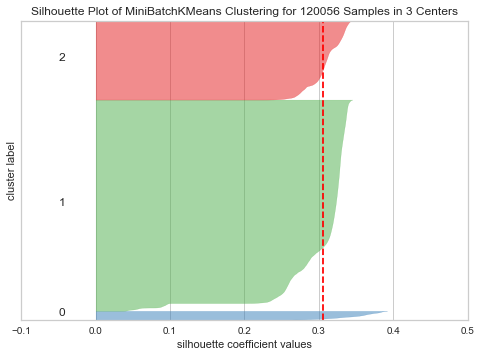

In [13]:
# First, lets visualize silhouettes for 3 possible clusters
# using yellowbrick 
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import SilhouetteVisualizer

#instantiate the clustering model and visualizer
model3 =  MiniBatchKMeans(3)
visualizer=SilhouetteVisualizer(model3)

visualizer.fit(accidents_clust)
visualizer.poof()

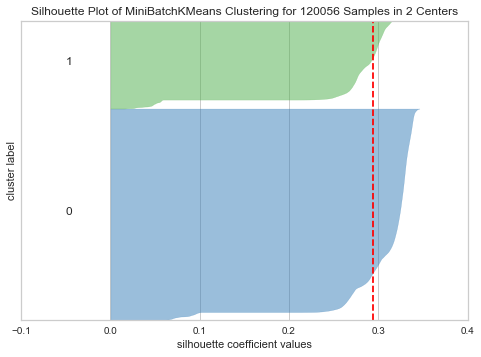

In [14]:
# Silhouette visualization for 2 possible clusters
# using yellowbrick

#instantiate the clustering model and visualizer
model2 =  MiniBatchKMeans(2)
visualizer=SilhouetteVisualizer(model2)

visualizer.fit(accidents_clust)
visualizer.poof()

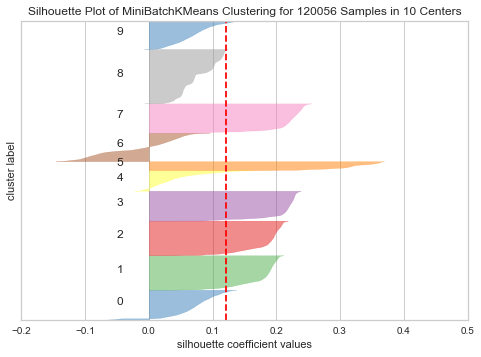

In [15]:
# Visualizing silhouettes for 10 possible clusters
# Using yellowbrick

# instantiate the clustering model and visualizer
model10 =  MiniBatchKMeans(10)
visualizer=SilhouetteVisualizer(model10)

visualizer.fit(accidents_clust)
visualizer.poof()

### Clustering

In [16]:
# Now, let's actually create 3 clusters
# Create 3 clusters using random seed = 123, fitting the data
clusters_model3 = KMeans(n_clusters=3, random_state=123).fit(accidents_clust)

In [17]:
#Get the size of each cluster
np.unique(clusters_model3.labels_, return_counts=True)

(array([0, 1, 2]), array([ 6701, 81733, 31622], dtype=int64))

In [18]:
# get centroids
centroids_model3 =  clusters_model3.cluster_centers_
# return centroids as a data frame
centers_model3= pd.DataFrame(centroids_model3, columns=[list(accidents_clust)])

In [19]:
# Display results
centers_model3

,BicycleInvolved,PedestrianInvolved,Holiday,RushHour,Daytime,AstroTwilight,NauticalTwilight,CivilTwilight,DIA_max_temp,DIA_min_temp,...,Neighboorhood_Westwood,Neighboorhood_Whittier,Neighboorhood_Windsor,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,0.031936,0.08939,0.027160,0.143859,0.376063,0.050589,0.045068,0.033279,0.640141,0.643944,...,0.026414,0.005522,0.006566,0.115057,0.104760,0.115057,0.127145,0.157290,0.191464,0.189225
1,0.013030,0.01686,0.021582,0.322648,0.794208,0.028862,0.038932,0.034515,0.633163,0.638941,...,0.015465,0.004025,0.007341,0.149401,0.161820,0.167362,0.165674,0.168781,0.105967,0.080995
2,0.011732,0.02299,0.027165,0.241224,0.614414,0.040794,0.042565,0.035039,0.637293,0.641997,...,0.028461,0.004838,0.006767,0.133673,0.132186,0.134811,0.142401,0.167004,0.151951,0.137974


In [20]:
#Inspect centroids for each variable (column)
#columns 1-14
centers_model3.iloc[:, :15]

,BicycleInvolved,PedestrianInvolved,Holiday,RushHour,Daytime,AstroTwilight,NauticalTwilight,CivilTwilight,DIA_max_temp,DIA_min_temp,DIA_precipitation,DIA_snowfall,St_max_temp,St_min_temp,St_precipitation
0,0.031936,0.08939,0.027160,0.143859,0.376063,0.050589,0.045068,0.033279,0.640141,0.643944,0.020527,0.012685,0.641090,0.630212,0.015481
1,0.013030,0.01686,0.021582,0.322648,0.794208,0.028862,0.038932,0.034515,0.633163,0.638941,0.023203,0.010743,0.636592,0.628224,0.018783
2,0.011732,0.02299,0.027165,0.241224,0.614414,0.040794,0.042565,0.035039,0.637293,0.641997,0.021643,0.012059,0.640481,0.630559,0.017610


In [21]:
#columns 15-29
centers_model3.iloc[:, 15:30]

,St_snowfall,DW_max_temp,DW_min_temp,DW_precipitation,DW_snowfall,OffenseCode_5401,OffenseCode_5420,OffenseCode_5441,OffenseExtension_0,OffenseExtension_1,OffenseExtension_2,OffenseExtension_3,OffenseType_TRAF-ACCIDENT-,OffenseType_TRAF-HIT & RUN,OffenseType_TRF-ACCIDENT
0,0.008915,0.640617,0.603562,0.025020,0.010580,3.597123e-14,5.360394e-01,4.639606e-01,0.536039,2.527981e-01,3.790479e-02,1.732577e-01,4.639606e-01,3.597123e-14,7.605028e-14
1,0.010753,0.636860,0.598839,0.029331,0.012679,-1.458278e-13,3.497203e-15,1.000000e+00,1.000000,-1.434443e-14,4.250073e-17,-1.162959e-14,-1.588660e-14,-1.458278e-13,1.000000e+00
2,0.009762,0.639610,0.603328,0.026998,0.011645,1.000000e+00,3.424344e-15,-6.439294e-15,1.000000,4.021089e-15,4.536302e-16,5.433154e-15,-6.595419e-15,1.000000e+00,1.411093e-13


In [22]:
#columns 30-44
centers_model3.iloc[:, 30:45]

,OffenseType_TRF-ACDT-DUI,OffenseCategory_TRAF - ACCIDENT,OffenseCategory_TRAF - ACCIDENT - DUI/DUID,OffenseCategory_TRAF - ACCIDENT - FATAL,OffenseCategory_TRAF - ACCIDENT - HIT & RUN,OffenseCategory_TRAF - ACCIDENT - POLICE,OffenseCategory_TRAF - ACCIDENT - SBI,Neighboorhood_Athmar Park,Neighboorhood_Auraria,Neighboorhood_Baker,Neighboorhood_Barnum,Neighboorhood_Barnum West,Neighboorhood_Bear Valley,Neighboorhood_Belcaro,Neighboorhood_Berkeley
0,5.360394e-01,7.605028e-14,5.360394e-01,3.790479e-02,3.597123e-14,1.732577e-01,2.527981e-01,0.012535,0.009252,0.037159,0.016266,0.007760,0.005223,0.005522,0.012834
1,3.497203e-15,1.000000e+00,3.497203e-15,4.250073e-17,-1.458278e-13,-1.162959e-14,-1.434443e-14,0.009849,0.008736,0.052182,0.011219,0.005628,0.004454,0.010216,0.010253
2,3.424344e-15,1.411093e-13,3.424344e-15,4.536302e-16,1.000000e+00,5.433154e-15,4.021089e-15,0.015053,0.009424,0.041933,0.013819,0.008159,0.005028,0.006641,0.012523


In [23]:
#columns 45-59
centers_model3.iloc[:, 45:60]

,Neighboorhood_CBD,Neighboorhood_Capitol Hill,Neighboorhood_Chaffee Park,Neighboorhood_Cheesman Park,Neighboorhood_Cherry Creek,Neighboorhood_City Park,Neighboorhood_City Park West,Neighboorhood_Civic Center,Neighboorhood_Clayton,Neighboorhood_Cole,Neighboorhood_College View - South Platte,Neighboorhood_Congress Park,Neighboorhood_Cory - Merrill,Neighboorhood_Country Club,Neighboorhood_DIA
0,0.020594,0.031936,0.006268,0.012535,0.008655,0.007312,0.007163,0.024026,0.004775,0.003880,0.010894,0.018654,0.004178,0.002238,0.008805
1,0.019698,0.026538,0.004001,0.012015,0.016224,0.006839,0.010339,0.015918,0.004172,0.002826,0.007109,0.017802,0.006619,0.003438,0.019490
2,0.023781,0.033774,0.004933,0.015970,0.016950,0.007147,0.011100,0.014863,0.005123,0.005566,0.011226,0.019259,0.005186,0.002656,0.008728


In [24]:
#columns 60-74
centers_model3.iloc[:, 60:75]

,Neighboorhood_East Colfax,Neighboorhood_Elyria Swansea,Neighboorhood_Five Points,Neighboorhood_Fort Logan,Neighboorhood_Gateway - Green Valley Ranch,Neighboorhood_Globeville,Neighboorhood_Goldsmith,Neighboorhood_Hale,Neighboorhood_Hampden,Neighboorhood_Hampden South,Neighboorhood_Harvey Park,Neighboorhood_Harvey Park South,Neighboorhood_Highland,Neighboorhood_Hilltop,Neighboorhood_Indian Creek
0,0.014177,0.021639,0.033428,0.005522,0.017311,0.030592,0.007611,0.007462,0.015669,0.022832,0.018206,0.009700,0.021788,0.005223,0.001642
1,0.010803,0.021717,0.031150,0.002875,0.018401,0.026574,0.011648,0.009164,0.014596,0.036509,0.010644,0.005530,0.023149,0.011403,0.000783
2,0.015053,0.019891,0.036841,0.003573,0.018879,0.021409,0.008886,0.008191,0.012902,0.022389,0.012523,0.007526,0.023054,0.007906,0.000854


In [25]:
#columns 75-89
centers_model3.iloc[:, 75:90]

,Neighboorhood_Jefferson Park,Neighboorhood_Kennedy,Neighboorhood_Lincoln Park,Neighboorhood_Lowry Field,Neighboorhood_Mar Lee,Neighboorhood_Marston,Neighboorhood_Montbello,Neighboorhood_Montclair,Neighboorhood_None,Neighboorhood_North Capitol Hill,Neighboorhood_North Park Hill,Neighboorhood_Northeast Park Hill,Neighboorhood_Overland,Neighboorhood_Platt Park,Neighboorhood_Regis
0,0.013132,0.002537,0.035965,0.007014,0.017311,0.005820,0.029399,0.007760,0.001343,0.016415,0.006417,0.015072,0.012535,0.006118,0.005522
1,0.015857,0.003120,0.029242,0.009702,0.011354,0.006998,0.025485,0.011868,0.000575,0.013630,0.006803,0.022280,0.011574,0.007573,0.004405
2,0.013219,0.003257,0.027007,0.007432,0.017045,0.005281,0.029347,0.008981,0.000696,0.015622,0.006736,0.017899,0.011290,0.008096,0.004902


In [26]:
#columns 90-104
centers_model3.iloc[:, 90:105]

,Neighboorhood_Rosedale,Neighboorhood_Ruby Hill,Neighboorhood_Skyland,Neighboorhood_Sloan Lake,Neighboorhood_South Park Hill,Neighboorhood_Southmoor Park,Neighboorhood_Speer,Neighboorhood_Stapleton,Neighboorhood_Sun Valley,Neighboorhood_Sunnyside,Neighboorhood_Union Station,Neighboorhood_University,Neighboorhood_University Hills,Neighboorhood_University Park,Neighboorhood_Valverde
0,0.005522,0.011789,0.005074,0.008954,0.006268,0.004178,0.019102,0.048948,0.008058,0.011640,0.021639,0.010148,0.007163,0.007014,0.003880
1,0.004086,0.007757,0.004307,0.005995,0.009274,0.008051,0.020114,0.058777,0.006179,0.010571,0.012994,0.010681,0.009604,0.009274,0.003719
2,0.003826,0.010815,0.003890,0.007495,0.007716,0.004238,0.018911,0.044210,0.007179,0.012713,0.023781,0.010214,0.009361,0.006957,0.006989


In [27]:
#columns 105-119
centers_model3.iloc[:, 105:120]

,Neighboorhood_Villa Park,Neighboorhood_Virginia Village,Neighboorhood_Washington Park,Neighboorhood_Washington Park West,Neighboorhood_Washington Virginia Vale,Neighboorhood_Wellshire,Neighboorhood_West Colfax,Neighboorhood_West Highland,Neighboorhood_Westwood,Neighboorhood_Whittier,Neighboorhood_Windsor,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3
0,0.013729,0.011192,0.009849,0.013729,0.012386,0.002238,0.015371,0.009999,0.026414,0.005522,0.006566,0.115057,0.104760,0.115057,0.127145
1,0.009776,0.014193,0.010155,0.017386,0.018511,0.001431,0.009299,0.010057,0.015465,0.004025,0.007341,0.149401,0.161820,0.167362,0.165674
2,0.015622,0.011922,0.005566,0.010436,0.014926,0.000949,0.015021,0.011669,0.028461,0.004838,0.006767,0.133673,0.132186,0.134811,0.142401


In [28]:
#columns 120-122
centers_model3.iloc[:, 120:]

,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,0.157290,0.191464,0.189225
1,0.168781,0.105967,0.080995
2,0.167004,0.151951,0.137974



A close look at centroids shows that KMeans clustering algorithm when splitting datapoints into 3 clusters, picked up on differences between the accident types (e.g., regular accident, hit and run, and DUI), but ignored all other factors.  It is not very helpful for detecting hidden trends in the accident data. There are two possible solutions - increase the number of clusters or to drop all columns that are closely related to types of accidents (e.g. offense types etc.)


In [29]:
#return cluster labels as a dataframe
labels_model3 = pd.DataFrame(clusters_model3.labels_, columns=['cluster'])

In [30]:
labels_model3.head()

,cluster
0,2
1,1
2,1
3,2
4,1


In [31]:
# add cluster labels to our data frame
accidents_3clusters = pd.merge(accidents_clust, labels_model3, left_index=True, right_index=True)

In [32]:
accidents_3clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120056 entries, 0 to 120055
Columns: 124 entries, BicycleInvolved to cluster
dtypes: float64(12), int32(1), int64(111)
memory usage: 119.0 MB


In [33]:
# First, let try to use Kmeans algorithm with 10 clusters
# Create 10 clusters using random seed = 123, fitting the data
clusters_model10 = KMeans(n_clusters=10, random_state=123).fit(accidents_clust)

In [34]:
#Get the size of each cluster
np.unique(clusters_model10.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([12211, 31622, 13795,  6620,  3109, 13226, 13541, 13679,  3592,
         8661], dtype=int64))

In [35]:
#get centroids
centroids_model10 =  clusters_model10.cluster_centers_
#return centroids as a data frame
centers_model10= pd.DataFrame(centroids_model10, columns=[list(accidents_clust)])

In [36]:
#Inspect centroids for each variable (column)
#columns 1-14
centers_model10.iloc[:, :15]

,BicycleInvolved,PedestrianInvolved,Holiday,RushHour,Daytime,AstroTwilight,NauticalTwilight,CivilTwilight,DIA_max_temp,DIA_min_temp,DIA_precipitation,DIA_snowfall,St_max_temp,St_min_temp,St_precipitation
0,0.013431,0.015805,0.087790,0.356973,0.815822,0.028663,0.039309,0.037835,0.630710,0.635062,0.027253,0.009540,0.639668,0.628240,0.019070
1,0.011732,0.022990,0.027165,0.241224,0.614414,0.040794,0.042565,0.035039,0.637293,0.641997,0.021643,0.012059,0.640481,0.630559,0.017610
2,0.011743,0.015440,0.016165,0.310040,0.794853,0.029358,0.037115,0.033708,0.634658,0.642106,0.019011,0.010724,0.626748,0.624169,0.020974
3,0.013595,0.018580,0.015408,0.192598,0.700755,0.034290,0.035952,0.029154,0.633070,0.638338,0.018893,0.009261,0.643786,0.625606,0.014581
4,0.061435,0.182052,0.023480,0.210679,0.575105,0.046960,0.046317,0.036024,0.650725,0.654692,0.019694,0.012110,0.652668,0.641126,0.016656
5,0.015046,0.017692,0.005897,0.366626,0.832980,0.024497,0.039241,0.033646,0.630541,0.639563,0.019593,0.015874,0.634336,0.628983,0.019149
6,0.012407,0.015878,0.009822,0.363563,0.807991,0.025330,0.041947,0.037885,0.628072,0.640022,0.029490,0.011960,0.642184,0.627825,0.023889
7,0.012793,0.016375,0.006726,0.360772,0.819577,0.028292,0.038599,0.037868,0.637743,0.638140,0.024274,0.005375,0.635241,0.631535,0.016362
8,0.006403,0.009187,0.030345,0.086024,0.203786,0.053731,0.043987,0.030902,0.630980,0.634641,0.021248,0.013182,0.631069,0.620764,0.014464
9,0.012354,0.020321,0.007389,0.202402,0.713313,0.037294,0.038910,0.025979,0.639036,0.638457,0.021454,0.012338,0.639276,0.630896,0.013379


In [37]:
#columns 15-29
centers_model10.iloc[:, 15:30]

,St_snowfall,DW_max_temp,DW_min_temp,DW_precipitation,DW_snowfall,OffenseCode_5401,OffenseCode_5420,OffenseCode_5441,OffenseExtension_0,OffenseExtension_1,OffenseExtension_2,OffenseExtension_3,OffenseType_TRAF-ACCIDENT-,OffenseType_TRAF-HIT & RUN,OffenseType_TRF-ACCIDENT
0,0.009408,0.633927,0.604897,0.029471,0.012851,6.433742e-14,3.233525e-15,1.000000e+00,1.000000e+00,2.723516e-15,5.928417e-16,-1.046038e-15,1.412065e-15,6.433742e-14,1.000000e+00
1,0.009762,0.639610,0.603328,0.026998,0.011645,1.000000e+00,3.424344e-15,-6.439294e-15,1.000000e+00,4.021089e-15,4.536302e-16,5.433154e-15,-6.595419e-15,1.000000e+00,1.411093e-13
2,0.009796,0.629223,0.592061,0.032844,0.009925,6.827872e-14,3.268219e-15,1.000000e+00,1.000000e+00,2.966377e-15,6.245005e-16,-8.049117e-16,3.899658e-15,6.827872e-14,1.000000e+00
3,0.017885,0.644196,0.614871,0.020300,0.024678,3.519407e-14,2.969847e-15,1.000000e+00,1.000000e+00,9.384854e-16,3.608225e-16,1.405126e-15,-2.858824e-15,3.519407e-14,1.000000e+00
4,0.009548,0.651805,0.612464,0.025892,0.011303,-8.160139e-15,2.324529e-15,1.000000e+00,-4.718448e-14,5.448697e-01,8.169830e-02,3.734320e-01,1.000000e+00,-8.160139e-15,-1.920686e-14
5,0.011920,0.636228,0.594995,0.031677,0.014473,6.694645e-14,3.257811e-15,1.000000e+00,1.000000e+00,2.884845e-15,6.140921e-16,-1.269818e-15,3.073930e-15,6.694645e-14,1.000000e+00
6,0.012333,0.644337,0.594290,0.031758,0.013438,6.772360e-14,3.264750e-15,1.000000e+00,1.000000e+00,2.929948e-15,6.197300e-16,-1.013079e-15,3.538836e-15,6.772360e-14,1.000000e+00
7,0.008137,0.638933,0.593367,0.030429,0.008950,6.800116e-14,3.268219e-15,1.000000e+00,1.000000e+00,2.949030e-15,6.223320e-16,-8.985868e-16,3.736594e-15,6.800116e-14,1.000000e+00
8,0.008368,0.630934,0.595858,0.024264,0.009954,-9.103829e-15,1.000000e+00,-5.717649e-14,1.000000e+00,-4.805184e-16,-1.951564e-17,-6.765422e-17,-7.632783e-16,-9.103829e-15,4.662937e-15
9,0.008604,0.633548,0.610468,0.021332,0.009616,5.018208e-14,3.105155e-15,1.000000e+00,1.000000e+00,1.856154e-15,4.800847e-16,1.439820e-16,-3.445161e-15,5.018208e-14,1.000000e+00


In [38]:
#columns 30-44
centers_model10.iloc[:, 30:45]

,OffenseType_TRF-ACDT-DUI,OffenseCategory_TRAF - ACCIDENT,OffenseCategory_TRAF - ACCIDENT - DUI/DUID,OffenseCategory_TRAF - ACCIDENT - FATAL,OffenseCategory_TRAF - ACCIDENT - HIT & RUN,OffenseCategory_TRAF - ACCIDENT - POLICE,OffenseCategory_TRAF - ACCIDENT - SBI,Neighboorhood_Athmar Park,Neighboorhood_Auraria,Neighboorhood_Baker,Neighboorhood_Barnum,Neighboorhood_Barnum West,Neighboorhood_Bear Valley,Neighboorhood_Belcaro,Neighboorhood_Berkeley
0,3.233525e-15,1.000000e+00,3.233525e-15,5.928417e-16,6.433742e-14,-1.046038e-15,2.723516e-15,0.011137,0.007944,0.048890,0.009745,0.005405,0.004340,0.010237,0.010155
1,3.424344e-15,1.411093e-13,3.424344e-15,4.536302e-16,1.000000e+00,5.433154e-15,4.021089e-15,0.015053,0.009424,0.041933,0.013819,0.008159,0.005028,0.006641,0.012523
2,3.268219e-15,1.000000e+00,3.268219e-15,6.245005e-16,6.827872e-14,-8.049117e-16,2.966377e-15,0.008844,0.008264,0.050091,0.010004,0.006162,0.003914,0.010076,0.009931
3,2.969847e-15,1.000000e+00,2.969847e-15,3.608225e-16,3.519407e-14,1.405126e-15,9.384854e-16,0.009970,0.009215,0.054532,0.013897,0.006495,0.004230,0.006647,0.010574
4,2.324529e-15,-1.920686e-14,2.324529e-15,8.169830e-02,-8.160139e-15,3.734320e-01,5.448697e-01,0.013509,0.008363,0.033451,0.014152,0.009328,0.005790,0.005146,0.011579
5,3.257811e-15,1.000000e+00,3.257811e-15,6.140921e-16,6.694645e-14,-1.269818e-15,2.884845e-15,0.009980,0.008015,0.052850,0.010736,0.005746,0.004385,0.011795,0.010132
6,3.264750e-15,1.000000e+00,3.264750e-15,6.197300e-16,6.772360e-14,-1.013079e-15,2.929948e-15,0.009157,0.008271,0.051695,0.012111,0.006425,0.004062,0.012481,0.009157
7,3.268219e-15,1.000000e+00,3.268219e-15,6.223320e-16,6.800116e-14,-8.985868e-16,2.949030e-15,0.008407,0.009357,0.052124,0.010162,0.003875,0.004752,0.009431,0.011258
8,1.000000e+00,4.662937e-15,1.000000e+00,-1.951564e-17,-9.103829e-15,-6.765422e-17,-4.805184e-16,0.011693,0.010022,0.040367,0.018096,0.006403,0.004733,0.005846,0.013920
9,3.105155e-15,1.000000e+00,3.105155e-15,4.800847e-16,5.018208e-14,1.439820e-16,1.856154e-15,0.012701,0.011084,0.058192,0.014202,0.005773,0.005888,0.008429,0.010969


In [39]:
#columns 45-59
centers_model10.iloc[:, 45:60]

,Neighboorhood_CBD,Neighboorhood_Capitol Hill,Neighboorhood_Chaffee Park,Neighboorhood_Cheesman Park,Neighboorhood_Cherry Creek,Neighboorhood_City Park,Neighboorhood_City Park West,Neighboorhood_Civic Center,Neighboorhood_Clayton,Neighboorhood_Cole,Neighboorhood_College View - South Platte,Neighboorhood_Congress Park,Neighboorhood_Cory - Merrill,Neighboorhood_Country Club,Neighboorhood_DIA
0,0.017034,0.024322,0.004340,0.011465,0.014905,0.008026,0.011219,0.016379,0.003112,0.002539,0.007616,0.015724,0.005733,0.003767,0.021866
1,0.023781,0.033774,0.004933,0.015970,0.016950,0.007147,0.011100,0.014863,0.005123,0.005566,0.011226,0.019259,0.005186,0.002656,0.008728
2,0.020152,0.026894,0.003914,0.011453,0.015803,0.006307,0.010004,0.016020,0.003914,0.002175,0.006524,0.015368,0.007032,0.002972,0.017543
3,0.025831,0.036254,0.004381,0.018127,0.013595,0.007855,0.009215,0.017674,0.006042,0.002719,0.006193,0.019789,0.004532,0.003927,0.028399
4,0.022194,0.033451,0.008363,0.013831,0.006111,0.007076,0.006755,0.034738,0.004503,0.004181,0.014152,0.012544,0.004503,0.001930,0.014474
5,0.016256,0.024119,0.003478,0.011190,0.017995,0.005746,0.010434,0.013836,0.003629,0.003176,0.008090,0.019205,0.007258,0.003780,0.015500
6,0.020087,0.023706,0.003323,0.010265,0.017355,0.006646,0.011521,0.017502,0.004874,0.003249,0.006646,0.017872,0.006794,0.002880,0.020383
7,0.018934,0.025587,0.004606,0.011112,0.016229,0.005921,0.010527,0.015352,0.004606,0.002851,0.006799,0.019665,0.007091,0.003728,0.016375
8,0.019209,0.030624,0.004454,0.011414,0.010857,0.007517,0.007517,0.014755,0.005011,0.003619,0.008073,0.023942,0.003898,0.002506,0.003898
9,0.023900,0.031290,0.004272,0.014433,0.016280,0.008660,0.008198,0.015356,0.003695,0.003117,0.007736,0.017896,0.006812,0.003233,0.022053


In [40]:
#columns 60-74
centers_model10.iloc[:, 60:75]

,Neighboorhood_East Colfax,Neighboorhood_Elyria Swansea,Neighboorhood_Five Points,Neighboorhood_Fort Logan,Neighboorhood_Gateway - Green Valley Ranch,Neighboorhood_Globeville,Neighboorhood_Goldsmith,Neighboorhood_Hale,Neighboorhood_Hampden,Neighboorhood_Hampden South,Neighboorhood_Harvey Park,Neighboorhood_Harvey Park South,Neighboorhood_Highland,Neighboorhood_Hilltop,Neighboorhood_Indian Creek
0,0.010400,0.022848,0.029072,0.003030,0.015314,0.023176,0.011383,0.009254,0.014905,0.038162,0.011056,0.006306,0.021210,0.011956,0.001147
1,0.015053,0.019891,0.036841,0.003573,0.018879,0.021409,0.008886,0.008191,0.012902,0.022389,0.012523,0.007526,0.023054,0.007906,0.000854
2,0.010729,0.024284,0.033780,0.002972,0.018557,0.030736,0.011598,0.008771,0.013846,0.036462,0.010511,0.005872,0.024937,0.010801,0.000507
3,0.012538,0.016012,0.039577,0.002568,0.021752,0.023716,0.009819,0.005589,0.013142,0.029607,0.012236,0.006042,0.025680,0.009819,0.000755
4,0.017369,0.022515,0.029270,0.005790,0.018012,0.025410,0.008363,0.008041,0.014796,0.021229,0.018334,0.010293,0.018012,0.006111,0.001930
5,0.008468,0.024951,0.030395,0.003100,0.017314,0.027975,0.013383,0.010963,0.013761,0.036746,0.010207,0.006276,0.021322,0.011266,0.000756
6,0.011447,0.020161,0.027841,0.002437,0.018315,0.026438,0.011742,0.009231,0.016247,0.038697,0.010634,0.004948,0.021638,0.011742,0.000443
7,0.010381,0.022224,0.028145,0.002705,0.019738,0.027195,0.011404,0.009869,0.014329,0.041597,0.009723,0.004532,0.023978,0.013744,0.001097
8,0.011414,0.020880,0.037027,0.005290,0.016704,0.035078,0.006960,0.006960,0.016425,0.024220,0.018096,0.009187,0.025056,0.004454,0.001392
9,0.013393,0.017088,0.034523,0.003348,0.019628,0.024016,0.011084,0.008429,0.015587,0.027710,0.011200,0.004849,0.024939,0.008775,0.000808


In [41]:
#columns 75-89
centers_model10.iloc[:, 75:90]

,Neighboorhood_Jefferson Park,Neighboorhood_Kennedy,Neighboorhood_Lincoln Park,Neighboorhood_Lowry Field,Neighboorhood_Mar Lee,Neighboorhood_Marston,Neighboorhood_Montbello,Neighboorhood_Montclair,Neighboorhood_None,Neighboorhood_North Capitol Hill,Neighboorhood_North Park Hill,Neighboorhood_Northeast Park Hill,Neighboorhood_Overland,Neighboorhood_Platt Park,Neighboorhood_Regis
0,0.017034,0.002457,0.029318,0.010564,0.011383,0.006551,0.029318,0.013349,0.001065,0.012202,0.007534,0.023995,0.012038,0.005896,0.004750
1,0.013219,0.003257,0.027007,0.007432,0.017045,0.005281,0.029347,0.008981,0.000696,0.015622,0.006736,0.017899,0.011290,0.008096,0.004902
2,0.015295,0.003045,0.027256,0.008916,0.012106,0.006452,0.026459,0.013628,0.000145,0.013773,0.006669,0.024502,0.010656,0.007321,0.004059
3,0.016616,0.003172,0.029003,0.008006,0.012538,0.008761,0.018278,0.009366,0.000906,0.016767,0.006798,0.015710,0.011480,0.005891,0.006193
4,0.010936,0.003216,0.037954,0.004181,0.019620,0.006111,0.029270,0.007398,0.001930,0.020585,0.006111,0.017691,0.010293,0.004181,0.005146
5,0.016105,0.003100,0.032739,0.010812,0.011568,0.005141,0.025405,0.010510,0.000454,0.012097,0.005897,0.020566,0.012324,0.009149,0.003705
6,0.014918,0.004579,0.029614,0.010191,0.010044,0.007163,0.026660,0.010708,0.000812,0.013071,0.006942,0.024149,0.011668,0.008640,0.004357
7,0.014694,0.002486,0.029461,0.009504,0.010235,0.006433,0.024563,0.013159,0.000439,0.013817,0.007164,0.023832,0.011770,0.007676,0.003655
8,0.015033,0.001949,0.034243,0.009465,0.015312,0.005568,0.029510,0.008073,0.000835,0.012806,0.006682,0.012806,0.014477,0.007795,0.005846
9,0.017434,0.002887,0.026209,0.008890,0.012701,0.010622,0.023785,0.010738,0.000346,0.015933,0.006581,0.018589,0.010853,0.007389,0.005427


In [42]:
#columns 90-104
centers_model10.iloc[:, 90:105]

,Neighboorhood_Rosedale,Neighboorhood_Ruby Hill,Neighboorhood_Skyland,Neighboorhood_Sloan Lake,Neighboorhood_South Park Hill,Neighboorhood_Southmoor Park,Neighboorhood_Speer,Neighboorhood_Stapleton,Neighboorhood_Sun Valley,Neighboorhood_Sunnyside,Neighboorhood_Union Station,Neighboorhood_University,Neighboorhood_University Hills,Neighboorhood_University Park,Neighboorhood_Valverde
0,0.004258,0.008517,0.003603,0.006142,0.009254,0.007944,0.017607,0.068299,0.005569,0.012284,0.010728,0.009582,0.010646,0.008517,0.003767
1,0.003826,0.010815,0.003890,0.007495,0.007716,0.004238,0.018911,0.044210,0.007179,0.012713,0.023781,0.010214,0.009361,0.006957,0.006989
2,0.004494,0.006959,0.004132,0.005944,0.008119,0.007321,0.020442,0.064009,0.005799,0.011743,0.013918,0.011018,0.010149,0.009714,0.003842
3,0.002115,0.009819,0.005136,0.007704,0.008912,0.004834,0.022508,0.052417,0.007251,0.007402,0.015408,0.008459,0.005438,0.007553,0.003776
4,0.003538,0.013509,0.006111,0.009649,0.007076,0.003860,0.016082,0.054037,0.009649,0.012223,0.022515,0.005146,0.006111,0.006755,0.004825
5,0.004158,0.008317,0.004915,0.006427,0.009678,0.009602,0.019961,0.058521,0.007636,0.011039,0.010812,0.011644,0.008846,0.009980,0.004007
6,0.004062,0.007533,0.004283,0.005022,0.010265,0.008271,0.020309,0.055092,0.006868,0.011668,0.012333,0.010339,0.010191,0.009896,0.003545
7,0.004532,0.007310,0.003728,0.005556,0.009065,0.009796,0.020031,0.057022,0.005337,0.010162,0.011843,0.012208,0.011477,0.010746,0.003582
8,0.007238,0.010301,0.004176,0.008352,0.005568,0.004454,0.021715,0.044543,0.006682,0.011136,0.020880,0.014477,0.008073,0.007238,0.003062
9,0.003926,0.006581,0.004965,0.006119,0.009583,0.006350,0.021360,0.050802,0.004849,0.006928,0.019051,0.010045,0.007736,0.006581,0.003464


In [43]:
#columns 105-119
centers_model10.iloc[:, 105:120]

,Neighboorhood_Villa Park,Neighboorhood_Virginia Village,Neighboorhood_Washington Park,Neighboorhood_Washington Park West,Neighboorhood_Washington Virginia Vale,Neighboorhood_Wellshire,Neighboorhood_West Colfax,Neighboorhood_West Highland,Neighboorhood_Westwood,Neighboorhood_Whittier,Neighboorhood_Windsor,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3
0,0.010073,0.016379,0.009336,0.017198,0.018344,0.001638,0.009500,0.010646,0.015805,0.004340,0.007452,1.000000e+00,3.180789e-14,3.885781e-14,-1.823541e-14
1,0.015622,0.011922,0.005566,0.010436,0.014926,0.000949,0.015021,0.011669,0.028461,0.004838,0.006767,1.336728e-01,1.321865e-01,1.348112e-01,1.424009e-01
2,0.010439,0.014208,0.009061,0.018485,0.019210,0.001232,0.007756,0.009859,0.013846,0.003407,0.006887,-2.431388e-14,3.860801e-14,4.551914e-14,-1.057487e-14
3,0.009819,0.009668,0.009517,0.012840,0.015408,0.001813,0.009517,0.011027,0.021752,0.003776,0.007704,-1.162959e-14,-1.554312e-14,-1.035283e-14,2.031708e-14
4,0.014796,0.009328,0.009328,0.010293,0.009328,0.001287,0.019299,0.009649,0.023159,0.005468,0.006755,1.219041e-01,1.312319e-01,1.453844e-01,1.537472e-01
5,0.008922,0.014668,0.012173,0.017390,0.019356,0.001890,0.009527,0.009527,0.014895,0.004158,0.008166,-2.381428e-14,1.000000e+00,4.332645e-14,-1.806888e-14
6,0.008345,0.015213,0.010561,0.019792,0.019127,0.001108,0.009970,0.010044,0.012554,0.004505,0.007163,-2.409184e-14,3.763656e-14,4.457545e-14,1.000000e+00
7,0.011039,0.014109,0.010966,0.017399,0.019738,0.001681,0.009357,0.009650,0.013817,0.003655,0.007895,-2.423062e-14,3.816392e-14,1.000000e+00,-1.204592e-14
8,0.012806,0.012806,0.010301,0.016704,0.015033,0.003062,0.011971,0.010301,0.029232,0.005568,0.006403,1.091314e-01,8.184855e-02,8.880846e-02,1.041203e-01
9,0.009814,0.012354,0.008544,0.015587,0.015818,0.000577,0.009814,0.010276,0.020783,0.004387,0.005773,-1.737499e-14,7.410739e-15,1.496026e-14,4.718448e-16


In [44]:
#columns 120-..
centers_model10.iloc[:, 120:]

,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,2.364775e-14,3.387568e-14,3.053113e-16
1,1.670040e-01,1.519512e-01,1.379736e-01
2,1.000000e+00,4.278522e-14,3.053113e-16
3,2.065015e-14,-2.151057e-15,1.000000e+00
4,1.601801e-01,1.550338e-01,1.325185e-01
5,2.389755e-14,3.982925e-14,3.053113e-16
6,2.398082e-14,4.149459e-14,3.053113e-16
7,2.400857e-14,4.220235e-14,3.053113e-16
8,1.547884e-01,2.229955e-01,2.383073e-01
9,2.217670e-14,1.000000e+00,3.053113e-16



Increasing the number of clusters allowed for a much bigger influence of the day of the week and time of the day in the resulting clusters. However, variables closely related to accident classifications still dominate clustering.

### Drop accident types columns and strart over

In [45]:
#Drop column closely related with accident classifications
accidents_notype = accidents_clust.drop(['OffenseCode_5401', 'OffenseCode_5420', 'OffenseCode_5441', 'OffenseExtension_0', 'OffenseExtension_1', 'OffenseExtension_2', 'OffenseExtension_3', 'OffenseType_TRAF-ACCIDENT-', 'OffenseType_TRAF-HIT & RUN',
 'OffenseType_TRF-ACCIDENT', 'OffenseType_TRF-ACDT-DUI', 'OffenseCategory_TRAF - ACCIDENT', 'OffenseCategory_TRAF - ACCIDENT - DUI/DUID', 'OffenseCategory_TRAF - ACCIDENT - FATAL',
 'OffenseCategory_TRAF - ACCIDENT - HIT & RUN', 'OffenseCategory_TRAF - ACCIDENT - POLICE', 'OffenseCategory_TRAF - ACCIDENT - SBI'], axis=1)

In [46]:
# check results
accidents_notype.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120056 entries, 0 to 120055
Columns: 106 entries, BicycleInvolved to DayOfWeek_6
dtypes: float64(12), int64(94)
memory usage: 103.0 MB


In [76]:
# Determine the optimum number of clusters using the "Elbow Method"
# explore 2 - 20  possible clusters 

clusters_range2= range(2,20)
#within sum of squared errors
sumOfSquares2=[]

#create clusters for each of the numbers in the range
#use random_state=123 to be able to replicate results

for numberOfClusters in clusters_range2:
    clusters = KMeans(numberOfClusters, random_state=123)
    clusters.fit(accidents_notype)
    sumOfSquares2.append(clusters.inertia_)

    
clusters_results2 = pd.DataFrame({'numberOfClusters': clusters_range2, 'sumOfSquares': sumOfSquares2})

# Display the number of clusters and the corresponding sum of squared errors
clusters_results2
    

,numberOfClusters,sumOfSquares
0,2,291122.126382
1,3,271022.013230
2,4,259211.621337
3,5,245670.016962
4,6,228308.554040
5,7,214908.160221
6,8,210570.547212
7,9,206518.366654
8,10,202774.763624
9,11,198907.132527


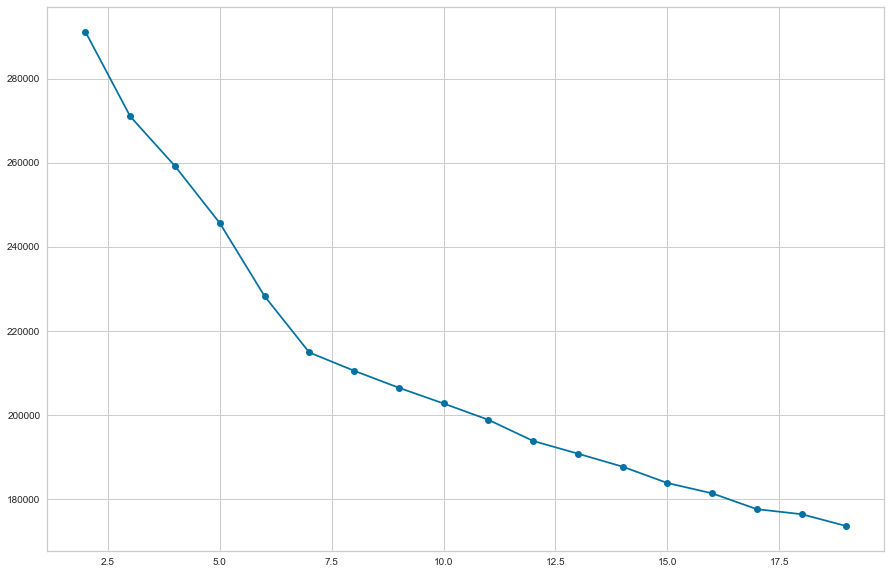

In [78]:
#plot results
plt.figure(figsize=(15, 10))
plt.plot(clusters_results2.numberOfClusters, clusters_results2.sumOfSquares, marker='o')


In [79]:
# 7 clusters seem to be optimum, but let's check using the silhouette method

# Calculate silhouette scores for 2 to 19 clusters
for numberOfClusters in clusters_range2:
    #initailize clusters with numberOfClusters vlaue and a random generator 123 for reproducibility
    clusters_notype2=KMeans(numberOfClusters, random_state=123)
    clusters_labelsnotype=clusters_notype2.fit_predict(accidents_notype)
    #silhouette scores - the mean Silhouette coefficient of all samples
    silhouette_avg = silhouette_score(accidents_notype, clusters_labelsnotype)
    print("For number of clusters = :", numberOfClusters, "The average silhouette score is :", silhouette_avg)


For number of clusters = : 2 The average silhuette score is : 0.1116651493244805
For number of clusters = : 3 The average silhuette score is : 0.08882946218369832
For number of clusters = : 4 The average silhuette score is : 0.09789576868491986
For number of clusters = : 5 The average silhuette score is : 0.15081294581076074
For number of clusters = : 6 The average silhuette score is : 0.17862332069263215
For number of clusters = : 7 The average silhuette score is : 0.19980199616595062
For number of clusters = : 8 The average silhuette score is : 0.1682728286575895
For number of clusters = : 9 The average silhuette score is : 0.16226665916862995
For number of clusters = : 10 The average silhuette score is : 0.14861356761561018
For number of clusters = : 11 The average silhuette score is : 0.15092645387859932
For number of clusters = : 12 The average silhuette score is : 0.14150717701552726
For number of clusters = : 13 The average silhuette score is : 0.1459462451137133
For number of c


Using seven clusters, in fact, yielded the yielded highest silhouette score of 0.19980199616595062.  
  

In [81]:
# Clustering the accident data without accident type
# Create 7 clusters using random seed = 123, fitting the data
clusters_notype7 = KMeans(n_clusters=7, random_state=123).fit(accidents_notype)

In [82]:
#Get the size of each cluster
np.unique(clusters_notype7.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([18896, 18108, 12251, 20130, 18713, 14749, 17209], dtype=int64))

In [83]:
#get centroids
centroids_notype7=  clusters_notype7.cluster_centers_
#return centroids as a data frame
centers_notype7= pd.DataFrame(centroids_notype7, columns=[list(accidents_notype)]) 

In [84]:
#Inspect centroids for each variable (column)
#columns 1-14
centers_notype7.iloc[:, :15]

,BicycleInvolved,PedestrianInvolved,Holiday,RushHour,Daytime,AstroTwighlight,NauticalTwighlight,CivilTwighlight,DIA_max_temp,DIA_min_temp,DIA_precipitation,DIA_snowfall,St_max_temp,St_min_temp,St_precipitation
0,0.013971,0.021063,0.012119,0.334780,0.761907,0.029424,0.042443,0.037839,0.628775,0.640392,0.028755,0.011780,0.642429,0.627746,0.023337
1,0.016402,0.022918,0.007069,0.342666,0.789264,0.028496,0.041087,0.034902,0.630414,0.639552,0.019816,0.016156,0.634149,0.628766,0.018969
2,0.011754,0.023998,0.013713,0.166680,0.565260,0.042201,0.037058,0.029549,0.637712,0.641664,0.017770,0.010385,0.646014,0.627550,0.013803
3,0.012668,0.021957,0.018579,0.283805,0.722702,0.035221,0.039245,0.034824,0.635183,0.642415,0.019752,0.011065,0.627844,0.624690,0.021219
4,0.014589,0.022872,0.007535,0.337680,0.780687,0.032330,0.040881,0.037461,0.638748,0.638967,0.023608,0.005731,0.637004,0.632680,0.016199
5,0.011730,0.025358,0.007323,0.180622,0.603092,0.038511,0.038375,0.026985,0.642530,0.641354,0.020750,0.013312,0.641779,0.632940,0.012964
6,0.014179,0.020513,0.096287,0.330873,0.766808,0.030042,0.041199,0.037364,0.631477,0.636170,0.026328,0.010208,0.640286,0.628970,0.018639


In [85]:
#Inspect centroids for each variable (column)
#columns 15-29
centers_notype7.iloc[:, 15:30]

,St_snowfall,DW_max_temp,DW_min_temp,DW_precipitation,DW_snowfall,Neighboorhood_Athmar Park,Neighboorhood_Auraria,Neighboorhood_Baker,Neighboorhood_Barnum,Neighboorhood_Barnum West,Neighboorhood_Bear Valley,Neighboorhood_Belcaro,Neighboorhood_Berkeley,Neighboorhood_CBD,Neighboorhood_Capitol Hill
0,0.011719,0.644348,0.594193,0.031180,0.012884,0.010214,0.008573,0.049323,0.011907,0.006509,0.004710,0.011113,0.009526,0.021433,0.025349
1,0.011639,0.635868,0.595050,0.032022,0.014124,0.010603,0.008505,0.050199,0.011431,0.005743,0.004694,0.010934,0.011542,0.017948,0.025458
2,0.015961,0.645990,0.616621,0.019371,0.021770,0.013958,0.009142,0.045547,0.017141,0.008244,0.005061,0.005877,0.010693,0.025304,0.038038
3,0.009667,0.630186,0.592553,0.032405,0.009742,0.009637,0.008693,0.047491,0.010879,0.006905,0.003825,0.008942,0.010631,0.020914,0.029608
4,0.008052,0.640318,0.594580,0.030200,0.008873,0.010153,0.009566,0.050339,0.010634,0.004596,0.004649,0.008924,0.011703,0.020146,0.026452
5,0.008124,0.635989,0.612062,0.020217,0.008925,0.014170,0.010848,0.051326,0.014984,0.007051,0.005763,0.007458,0.012340,0.024205,0.033901
6,0.008978,0.634489,0.606011,0.028866,0.012536,0.012552,0.007670,0.045674,0.010576,0.006566,0.004242,0.008426,0.010750,0.017723,0.026382


In [86]:
#Inspect centroids for each variable (column)
#columns 30-44
centers_notype7.iloc[:, 30:45]

,Neighboorhood_Chaffee Park,Neighboorhood_Cheesman Park,Neighboorhood_Cherry Creek,Neighboorhood_City Park,Neighboorhood_City Park West,Neighboorhood_Civic Center,Neighboorhood_Clayton,Neighboorhood_Cole,Neighboorhood_College View - South Platte,Neighboorhood_Congress Park,Neighboorhood_Cory - Merrill,Neighboorhood_Country Club,Neighboorhood_DIA,Neighboorhood_East Colfax,Neighboorhood_Elyria Swansea
0,0.003281,0.012701,0.017570,0.006509,0.011696,0.017358,0.004763,0.003969,0.007727,0.018999,0.006351,0.002487,0.017570,0.011325,0.019740
1,0.004694,0.012702,0.016678,0.005854,0.010824,0.014855,0.004142,0.003645,0.008946,0.019825,0.006958,0.003645,0.014414,0.009940,0.023857
2,0.004816,0.016162,0.012652,0.007510,0.008897,0.016570,0.005387,0.003592,0.007754,0.019509,0.004326,0.003755,0.018203,0.013876,0.017713
3,0.004223,0.012022,0.016692,0.006359,0.010283,0.015748,0.004372,0.003577,0.008544,0.016095,0.005812,0.002683,0.014506,0.012469,0.022802
4,0.005023,0.012558,0.015818,0.006413,0.011382,0.016192,0.004970,0.003634,0.007642,0.019291,0.006787,0.003153,0.014856,0.011650,0.021803
5,0.003932,0.013899,0.016476,0.008136,0.008001,0.015255,0.004271,0.003797,0.008950,0.017967,0.005967,0.003254,0.015798,0.014645,0.018171
6,0.004765,0.012842,0.014876,0.008426,0.010460,0.016677,0.003487,0.003022,0.009239,0.016387,0.005927,0.003487,0.017956,0.011912,0.022779


In [87]:
#Inspect centroids for each variable (column)
#columns 45-59
centers_notype7.iloc[:, 45:60]

,Neighboorhood_Five Points,Neighboorhood_Fort Logan,Neighboorhood_Gateway - Green Valley Ranch,Neighboorhood_Globeville,Neighboorhood_Goldsmith,Neighboorhood_Hale,Neighboorhood_Hampden,Neighboorhood_Hampden South,Neighboorhood_Harvey Park,Neighboorhood_Harvey Park South,Neighboorhood_Highland,Neighboorhood_Hilltop,Neighboorhood_Indian Creek,Neighboorhood_Jefferson Park,Neighboorhood_Kennedy
0,0.029318,0.003017,0.018522,0.025931,0.011219,0.008679,0.015665,0.034875,0.010584,0.005345,0.021909,0.011061,0.000476,0.015083,0.004498
1,0.031257,0.003479,0.017009,0.026287,0.011984,0.010051,0.013861,0.034460,0.010824,0.006627,0.021537,0.010603,0.001049,0.014690,0.003148
2,0.041384,0.003183,0.021141,0.023672,0.007918,0.005469,0.012326,0.023345,0.013713,0.007265,0.023753,0.007673,0.000571,0.015427,0.003592
3,0.035320,0.003328,0.018530,0.028564,0.011277,0.009041,0.014357,0.032091,0.011376,0.006359,0.024789,0.009786,0.000745,0.014605,0.003030
4,0.029178,0.003260,0.018704,0.025490,0.011703,0.009566,0.013680,0.036392,0.010474,0.005237,0.023460,0.012184,0.001069,0.014535,0.002619
5,0.036138,0.003187,0.020340,0.023730,0.008882,0.009153,0.013899,0.025697,0.012882,0.006238,0.025222,0.007390,0.001017,0.015052,0.002644
6,0.030101,0.002964,0.016096,0.023011,0.010518,0.008658,0.014992,0.033122,0.012145,0.007380,0.021036,0.010925,0.000988,0.015922,0.002324


In [88]:
#Inspect centroids for each variable (column)
#columns 60-74
centers_notype7.iloc[:, 60:75]

,Neighboorhood_Lincoln Park,Neighboorhood_Lowry Field,Neighboorhood_Mar Lee,Neighboorhood_Marston,Neighboorhood_Montbello,Neighboorhood_Montclair,Neighboorhood_None,Neighboorhood_North Capitol Hill,Neighboorhood_North Park Hill,Neighboorhood_Northeast Park Hill,Neighboorhood_Overland,Neighboorhood_Platt Park,Neighboorhood_Regis,Neighboorhood_Rosedale,Neighboorhood_Ruby Hill
0,0.030165,0.009367,0.010849,0.006456,0.026725,0.010214,0.000847,0.014448,0.006827,0.021856,0.012013,0.008573,0.004604,0.004340,0.007621
1,0.031809,0.010548,0.012702,0.005136,0.026397,0.010382,0.000497,0.012646,0.006130,0.019549,0.012425,0.009443,0.003645,0.003976,0.008836
2,0.026365,0.007346,0.017141,0.007020,0.023672,0.007836,0.000898,0.016570,0.006530,0.015182,0.011673,0.005632,0.006285,0.002204,0.012734
3,0.027869,0.008544,0.013015,0.005961,0.027322,0.012568,0.000149,0.014605,0.006359,0.022553,0.009985,0.007998,0.004322,0.004918,0.007700
4,0.030567,0.009085,0.011489,0.006466,0.025704,0.011703,0.000588,0.014696,0.007481,0.022337,0.011917,0.007588,0.003474,0.004329,0.008123
5,0.025832,0.007662,0.015323,0.008814,0.025968,0.009763,0.000678,0.014509,0.006645,0.017357,0.011458,0.006645,0.004814,0.003661,0.008814
6,0.029171,0.009414,0.013656,0.006160,0.030275,0.012377,0.001046,0.013365,0.007322,0.023650,0.011564,0.006566,0.005753,0.004474,0.009181


In [89]:
#Inspect centroids for each variable (column)
#columns 75-89
centers_notype7.iloc[:, 75:90]

,Neighboorhood_Skyland,Neighboorhood_Sloan Lake,Neighboorhood_South Park Hill,Neighboorhood_Southmoor Park,Neighboorhood_Speer,Neighboorhood_Stapleton,Neighboorhood_Sun Valley,Neighboorhood_Sunnyside,Neighboorhood_Union Station,Neighboorhood_University,Neighboorhood_University Hills,Neighboorhood_University Park,Neighboorhood_Valverde,Neighboorhood_Villa Park,Neighboorhood_Virginia Village
0,0.004022,0.005345,0.009526,0.007621,0.019634,0.052445,0.006668,0.012172,0.014659,0.010531,0.010002,0.009367,0.004022,0.010478,0.015718
1,0.004639,0.007013,0.009940,0.008284,0.019494,0.055279,0.007234,0.011431,0.012425,0.011597,0.008725,0.009167,0.004418,0.010382,0.014082
2,0.004734,0.007673,0.006938,0.004081,0.020733,0.046200,0.007754,0.010203,0.024161,0.008897,0.006938,0.006938,0.006122,0.013795,0.008244
3,0.004372,0.006011,0.007799,0.006011,0.020964,0.057874,0.006110,0.011674,0.017685,0.010830,0.009339,0.008942,0.004620,0.011773,0.014208
4,0.003687,0.005878,0.008764,0.008550,0.019452,0.054668,0.005825,0.011115,0.012879,0.011596,0.011062,0.009833,0.004008,0.012077,0.013253
5,0.004407,0.007729,0.009085,0.005153,0.020408,0.047868,0.005763,0.008340,0.024544,0.009424,0.008001,0.006712,0.004949,0.011119,0.010509
6,0.004010,0.006973,0.008368,0.006915,0.017723,0.062642,0.006799,0.012552,0.011738,0.009995,0.010692,0.007787,0.004591,0.011796,0.015689


In [90]:
#Inspect centroids for each variable (column)
#columns 90-104
centers_notype7.iloc[:, 90:105]

,Neighboorhood_Washington Park,Neighboorhood_Washington Park West,Neighboorhood_Washington Virginia Vale,Neighboorhood_Wellshire,Neighboorhood_West Colfax,Neighboorhood_West Highland,Neighboorhood_Westwood,Neighboorhood_Whittier,Neighboorhood_Windsor,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5
0,0.009896,0.017782,0.017358,0.001164,0.011749,0.010902,0.015612,0.005080,0.006456,-2.747802e-14,5.281886e-14,5.945244e-14,1.000000e+00,2.489675e-14,3.451406e-14
1,0.010493,0.016346,0.018279,0.001657,0.010493,0.009996,0.017506,0.003755,0.008339,-2.711720e-14,1.000000e+00,5.781486e-14,3.089196e-14,2.478573e-14,4.106437e-14
2,0.007101,0.011591,0.014529,0.001306,0.013468,0.010367,0.029793,0.004734,0.006448,-2.284284e-14,3.200218e-14,3.902434e-14,-1.837419e-14,2.364775e-14,3.412548e-14
3,0.008445,0.016095,0.016990,0.001043,0.010035,0.010681,0.016990,0.003726,0.007004,-2.800538e-14,5.517808e-14,6.175616e-14,4.421463e-14,1.000000e+00,2.529921e-14
4,0.010207,0.015764,0.019291,0.001710,0.011489,0.009993,0.016085,0.003848,0.007535,-2.739475e-14,5.245804e-14,1.000000e+00,3.516631e-14,2.486900e-14,3.599898e-14
5,0.007323,0.012882,0.014781,0.001085,0.011187,0.010441,0.026375,0.005356,0.006577,-2.509104e-14,4.202194e-14,4.887757e-14,6.938894e-16,2.423062e-14,1.000000e+00
6,0.008077,0.015108,0.018014,0.001453,0.010402,0.010925,0.019292,0.004126,0.007380,1.000000e+00,4.907186e-14,5.576095e-14,2.395306e-14,2.467471e-14,4.926615e-14


In [91]:
#Inspect centroids for each variable (column)
#columns 105-..
centers_notype7.iloc[:, 105:]

,DayOfWeek_6
0,3.053113e-16
1,3.053113e-16
2,1.000000e+00
3,-3.747003e-16
4,3.053113e-16
5,3.053113e-16
6,3.053113e-16



A quick look at the centroids, shows that the days of the week seem to be the most important factors defining clusters.


In [98]:
#return cluster labels as a dataframe
labels_modelnotype7 = pd.DataFrame(clusters_notype7.labels_, columns=['cluster'])

In [100]:
#chech the results
labels_modelnotype7.head()

,cluster
0,4
1,4
2,4
3,4
4,4


In [101]:
# add cluster labels to our data frame
accidents_7notypeclusters = pd.merge(accidents_notype, labels_modelnotype7, left_index=True, right_index=True)

In [102]:
#Check results
accidents_7notypeclusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120056 entries, 0 to 120055
Columns: 107 entries, BicycleInvolved to cluster
dtypes: float64(12), int32(1), int64(94)
memory usage: 103.5 MB


### PCA

In [104]:
#Principal component analysis (PCA)
from sklearn.decomposition import PCA
#project data into 2 components
pca_accident=PCA(n_components=2).fit(accidents_notype)

In [106]:
#transform the data into the new space
pca_trans = pca_accident.transform(accidents_notype)

In [107]:
# return projection as a data frame with named columns
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])

In [108]:
#concatenate the data
accidentspca_7notype = pd.concat([labels_modelnotype7, pca_trans_df], axis=1)

In [109]:
accidentspca_7notype.head()

,cluster,pca1,pca2
0,4,0.739199,0.272572
1,4,0.739001,0.272536
2,4,0.736876,0.273499
3,4,0.734775,0.275532
4,4,0.737444,0.280236


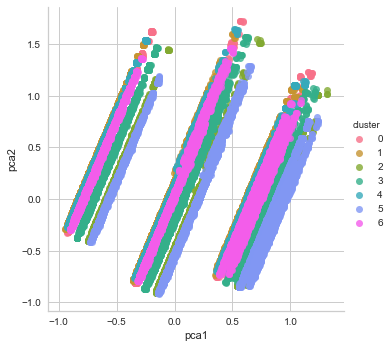

In [125]:
#Visualize clusters
fig = sns.lmplot(x='pca1', y='pca2', data=accidentspca_7notype, hue='cluster', fit_reg=False)
plt.show()

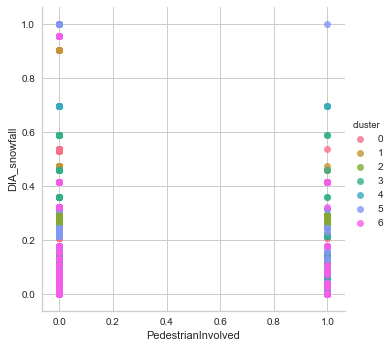

In [128]:
fig1 = sns.lmplot(x='PedestrianInvolved', y='DIA_snowfall', data=accidents_7notypeclusters, hue='cluster', fit_reg=False)

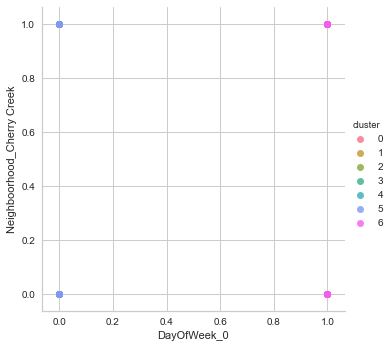

In [129]:
fig2 = sns.lmplot(x='DayOfWeek_0', y='Neighboorhood_Cherry Creek', data=accidents_7notypeclusters, hue='cluster', fit_reg=False)

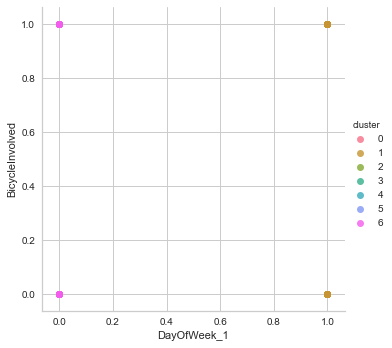

In [130]:
fig3 = sns.lmplot(x='DayOfWeek_1', y='BicycleInvolved', data=accidents_7notypeclusters, hue='cluster', fit_reg=False)

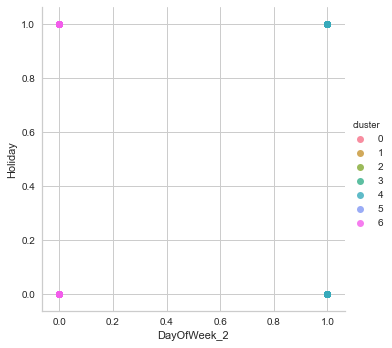

In [131]:
fig4 = sns.lmplot(x='DayOfWeek_2', y='Holiday', data=accidents_7notypeclusters, hue='cluster', fit_reg=False)

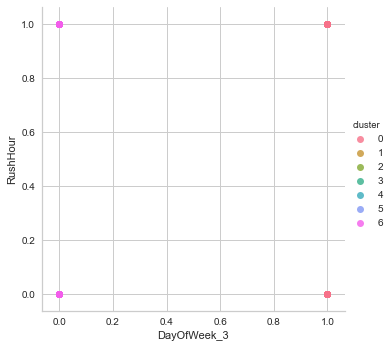

In [132]:
fig5 = sns.lmplot(x='DayOfWeek_3', y='RushHour', data=accidents_7notypeclusters, hue='cluster', fit_reg=False)

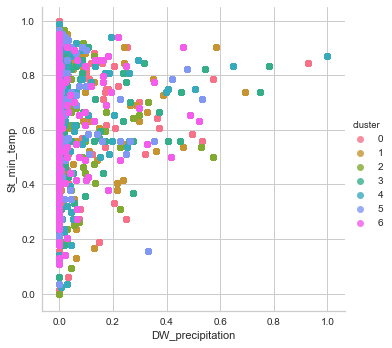

In [133]:
fig5 = sns.lmplot(x='DW_precipitation', y='St_min_temp', data=accidents_7notypeclusters, hue='cluster', fit_reg=False)


The main trend picked up by the K Means clustering algorithm is that the car accidents in Denver are highly dependent on the day of the week.  It might be necessary to use different clustering algorithms (better suited for working with multiple categorical variables encoded in the dataset) in order to be able to discover other trends and to study the cyclical character of the accident data using time series.
